In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

with open('/Data_EDA/pga.pickle', 'rb') as file:
    g = pickle.load(file)
g.head()

,money,name,height_inches,weight_lbs,birthyear,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG
0,25271,Robert Allenby,73.0,180,1971,51.0,55.06,2016,282.2,63.73,30.41,50.75,73.117,9,0.0,-0.491,-1.950,-0.631,-0.460,-0.368
1,271887,Robert Allenby,73.0,180,1971,63.0,63.06,2015,282.7,66.67,30.03,51.69,72.102,169,1.0,-0.754,-0.970,-0.262,0.260,-0.213
2,514288,Robert Allenby,73.0,180,1971,83.0,61.47,2014,284.9,67.63,29.85,59.96,70.920,438,0.0,-0.163,0.105,-0.050,0.552,-0.234
3,204272,Robert Allenby,73.0,180,1971,58.0,57.87,2013,284.9,62.40,29.64,52.77,72.056,129,1.0,-0.337,-0.859,-0.733,0.296,-0.085
4,808927,Robert Allenby,73.0,180,1971,76.0,59.34,2012,286.7,65.79,29.91,50.85,71.355,417,2.0,-0.428,-0.626,-0.449,0.537,-0.286


In [2]:
g.columns

Index(['money', 'name', 'height_inches', 'weight_lbs', 'birthyear', 'Rounds',
       'Fairway Percentage', 'Year', 'Avg Distance', 'gir', 'Average Putts',
       'Average Scrambling', 'Average Score', 'Points', 'Top 10',
       'Average SG Putts', 'Average SG Total', 'SG:OTT', 'SG:APR', 'SG:ARG'],
      dtype='object')

In [3]:
g_small = g[['money','Rounds','Average SG Putts','SG:OTT','SG:APR','SG:ARG']]

In [4]:
g_small.head()

,money,Rounds,Average SG Putts,SG:OTT,SG:APR,SG:ARG
0,25271,51.0,-0.491,-0.631,-0.460,-0.368
1,271887,63.0,-0.754,-0.262,0.260,-0.213
2,514288,83.0,-0.163,-0.050,0.552,-0.234
3,204272,58.0,-0.337,-0.733,0.296,-0.085
4,808927,76.0,-0.428,-0.449,0.537,-0.286


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

***
**Try Log Transformation**

In [6]:
import math
g_small['logmoney'] = g_small['money'].apply(lambda x: math.log(x))

/home/rob/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


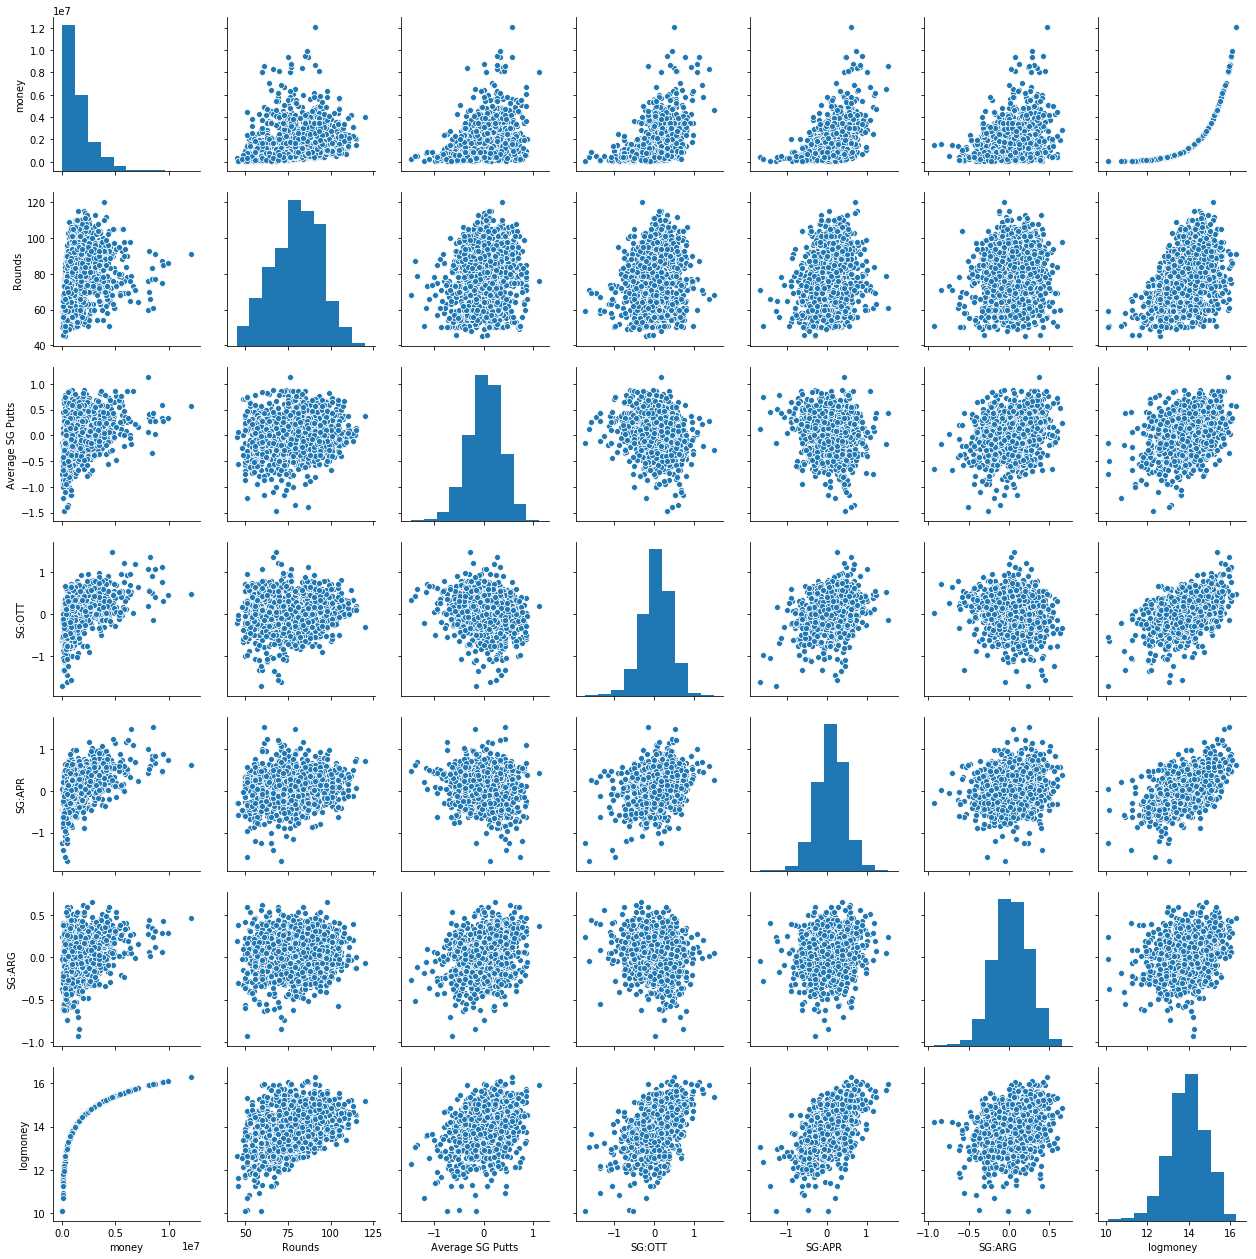

In [7]:
fig = sns.pairplot(g_small).set_syle=('dark')
#plt.savefig('logplot.png', transparent=False)
plt.show()
plt.close()

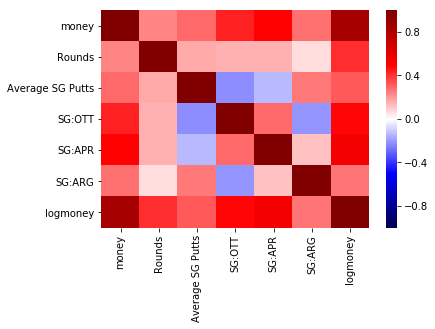

In [8]:
sns.heatmap(g_small.corr(), cmap='seismic', vmin=-1, vmax=1)
plt.show()
plt.close()

In [9]:
g_small.corr()

,money,Rounds,Average SG Putts,SG:OTT,SG:APR,SG:ARG,logmoney
money,1.000000,0.239102,0.290540,0.435384,0.496893,0.275590,0.851547
Rounds,0.239102,1.000000,0.168994,0.154982,0.152273,0.067228,0.412711
Average SG Putts,0.290540,0.168994,1.000000,-0.226307,-0.134257,0.261474,0.321436
SG:OTT,0.435384,0.154982,-0.226307,1.000000,0.296781,-0.210219,0.487238
SG:APR,0.496893,0.152273,-0.134257,0.296781,1.000000,0.117696,0.544581
SG:ARG,0.275590,0.067228,0.261474,-0.210219,0.117696,1.000000,0.271761
logmoney,0.851547,0.412711,0.321436,0.487238,0.544581,0.271761,1.000000


In [31]:
#Simple validation method: train/validation/test  60-20-20

X, y = g_small.drop(['logmoney','money'], axis=1), g_small['logmoney']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

lm = LinearRegression()

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=100)

poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

lm.fit(X_train, y_train)
print(f'Linear Regression train R^2: {lm.score(X_train, y_train):.3f}')
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression train R^2: {lm_reg.score(X_train_scaled, y_train):.3f}')
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')


lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression train R^2: {lm_poly.score(X_train_poly,y_train):.3f}')
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression train R^2: 0.726
Linear Regression val R^2: 0.660
Ridge Regression train R^2: 0.720
Ridge Regression val R^2: 0.650
Degree 2 polynomial regression train R^2: 0.741
Degree 2 polynomial regression val R^2: 0.669


In [32]:
lm.fit(X,y)
print(f'Linear Regression val R^2: {lm.score(X_test, y_test):.3f}')

lm_reg.fit(X,y)
print(f'Ridge Regression val R^2: {lm_reg.score(X_test, y_test):.3f}')

lm_poly.fit(X,y)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_test, y_test):.3f}')

Linear Regression val R^2: 0.725
Ridge Regression val R^2: 0.632
Degree 2 polynomial regression val R^2: 0.725


In [33]:
lm_poly.coef_

array([0.01234178, 1.02048896, 1.114053  , 1.00211076, 0.81582118])

***
**Tweak model with lasso and ridge**

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

%pylab inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


/home/rob/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['poly']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [35]:
lasso_model = Lasso(alpha = .01)
lasso_model.fit(X_train, y_train)
list(zip(X_train.columns, lasso_model.coef_))

[('Rounds', 0.012887598248467231),
 ('Average SG Putts', 0.8964651090880121),
 ('SG:OTT', 1.0319785999155815),
 ('SG:APR', 0.9453922140289629),
 ('SG:ARG', 0.6177658025757142)]

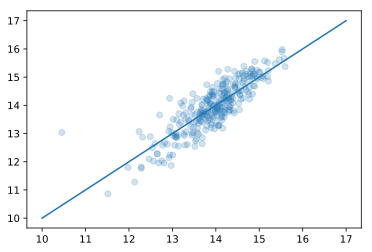

In [36]:
test_set_pred = lasso_model.predict(X_test)
plt.scatter(test_set_pred, y_test, alpha=.2)
plt.plot(np.linspace(10,17,100), np.linspace(10,17,100))

In [37]:
r2_score(y_test, test_set_pred)

0.7198144550164216

In [42]:
lasso_model = Lasso(alpha = .1)
lasso_model.fit(X_train_scaled, y_train)
list(zip(X_train.columns, lasso_model.coef_))

[('Rounds', 0.11397974421834149),
 ('Average SG Putts', 0.23765462920612215),
 ('SG:OTT', 0.31436845866073804),
 ('SG:APR', 0.3173694155006985),
 ('SG:ARG', 0.0997587491513001)]

***

In [43]:
lr_model_ridge = Ridge(alpha = 10)
lr_model_ridge.fit(X_train, y_train)
list(zip(X_train.columns, lr_model_ridge.coef_))

[('Rounds', 0.013006713883297107),
 ('Average SG Putts', 0.8815908376190245),
 ('SG:OTT', 1.0232496539357836),
 ('SG:APR', 0.9356815863515293),
 ('SG:ARG', 0.6681902224690924)]

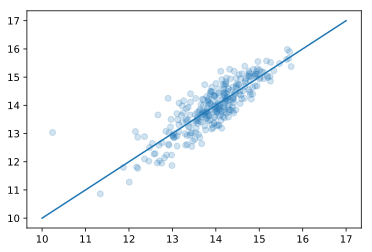

In [19]:
test_set_pred = lr_model_ridge.predict(X_test)
plt.scatter(test_set_pred, y_test, alpha=.2)
plt.plot(np.linspace(10,17,100), np.linspace(10,17,100))

In [20]:
r2_score(y_test, test_set_pred)

0.7240046443143553

In [21]:
lr_model_ridge = Ridge(alpha = 1)
lr_model_ridge.fit(X_train_scaled, y_train)
list(zip(X_train.columns, lr_model_ridge.coef_))

[('Rounds', 0.16212915382896526),
 ('Average SG Putts', 0.3428073577341086),
 ('SG:OTT', 0.4287455473789343),
 ('SG:APR', 0.37691088411092016),
 ('SG:ARG', 0.1801032215673719)]

***

In [22]:
from sklearn.linear_model import lars_path

In [23]:
alphas, _, coefs = lars_path(X_train_scaled, y_train.values, method='lasso')

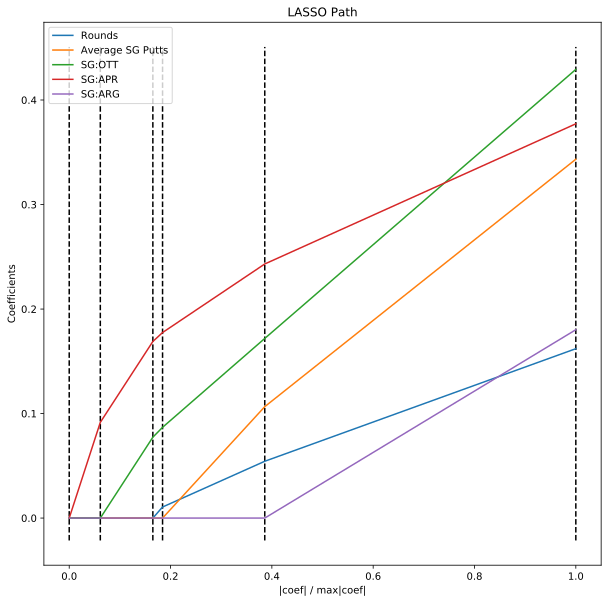

In [24]:
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.show()